In [4]:
"""Imports."""

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import lognorm

In [5]:
"""Examining skewness of the data."""

df_income = pd.read_csv("/workspace/data/y_trn.csv")
skewness = df_income['realrinc'].skew()

print(skewness)

6.753899237711517


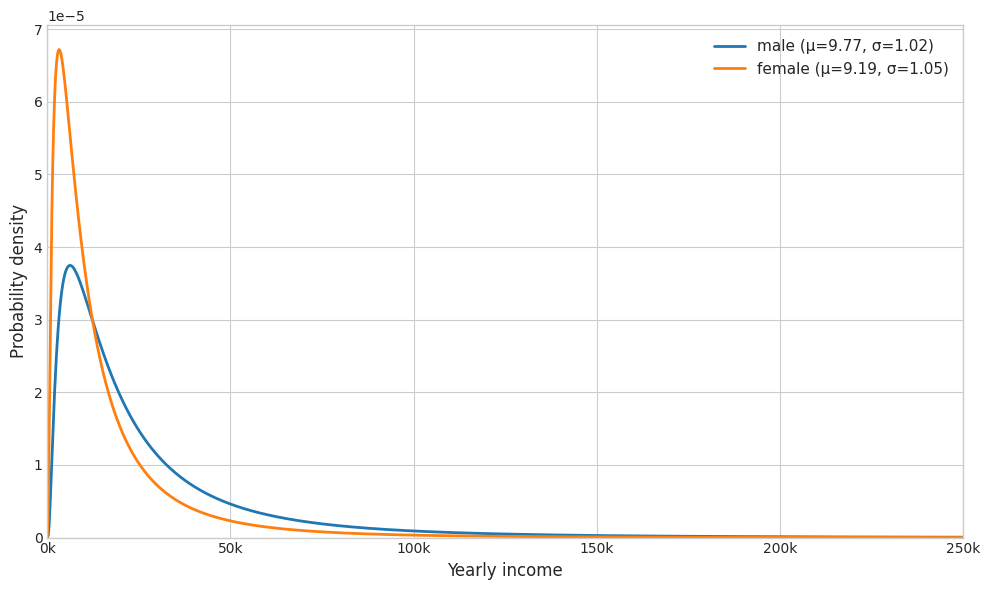

In [7]:
"""Examine the income inequality across genders in 1980."""

with open("/workspace/results/genders/distribution_params_1980.json", 'r', encoding='utf-8') as f:
    params = json.load(f)

x = np.linspace(0, 250000, 1000)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

for label, p in params.items():
    mu = p['mu']
    sigma = p['sigma']
    pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    
    ax.plot(x, pdf, label=f'{label} (μ={mu:.2f}, σ={sigma:.2f})', linewidth=2)

ax.set_xlabel('Yearly income', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12)
ax.legend(fontsize=11)
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda val, _: f"{int(val/1000)}k")
)

ax.set_xlim(0, 250000)
ax.set_ylim(bottom=0)

plt.tight_layout()

results_dir = '../results/figures'
os.makedirs(results_dir, exist_ok=True)
file_path = os.path.join(results_dir, '1980_distributions.png')
plt.savefig(file_path, dpi=300)

plt.show()

Number of simulations: 1000
Times male earned more than female: 647
Probability that a male earns more than a female: 64.7%


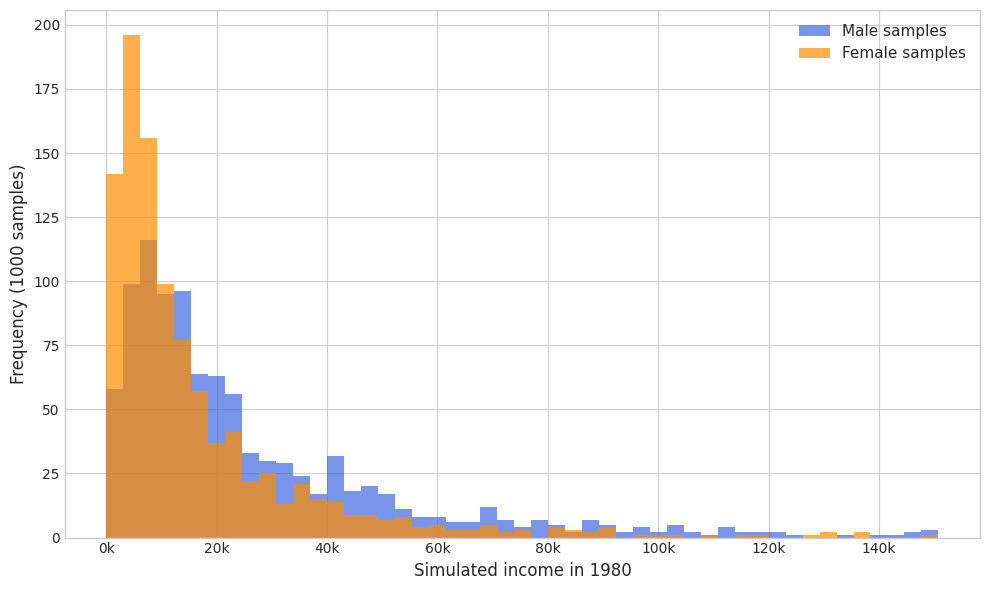

In [9]:
"""MC sampling to compute the P(male_income > female_income | T=1980)."""

n_samples = 1000
with open("/workspace/results/genders/distribution_params_1980.json", 'r', encoding='utf-8') as f:
    params = json.load(f)

male_params = params['male']
female_params = params['female']

male_samples = np.random.lognormal(mean=male_params['mu'], sigma=male_params['sigma'], size=n_samples)
female_samples = np.random.lognormal(mean=female_params['mu'], sigma=female_params['sigma'], size=n_samples)

male_earns_more_count = np.sum(male_samples > female_samples)
probability = male_earns_more_count / n_samples

print(f"Number of simulations: {n_samples}")
print(f"Times male earned more than female: {male_earns_more_count}")
print(f"Probability that a male earns more than a female: {probability:.1%}")

def plot_histograms(male_data, female_data):
    """Generates and saves a histogram comparison plot for a given year."""
    plt.style.use('seaborn-v0_8-whitegrid')
    _, ax = plt.subplots(figsize=(10, 6))

    max_val = max(np.percentile(male_data, 99), np.percentile(female_data, 99))
    bins = np.linspace(0, max_val, 50)

    ax.hist(male_data, bins=bins, alpha=0.7, label='Male samples', color='royalblue')
    ax.hist(female_data, bins=bins, alpha=0.7, label='Female samples', color='darkorange')

    ax.set_xlabel('Simulated income in 1980', fontsize=12)
    ax.set_ylabel('Frequency (1000 samples)', fontsize=12)
    ax.legend(fontsize=11)

    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda val, _: f"{int(val/1000)}k")
    )
    plt.tight_layout()

    results_dir = '../results/figures'
    os.makedirs(results_dir, exist_ok=True)
    file_path = os.path.join(results_dir, '1980_samples.png')
    plt.savefig(file_path, dpi=300)

    plt.show()

plot_histograms(male_data=male_samples, female_data=female_samples)

Number of simulations: 1000
Times male earned more than female: 618
Probability that a male earns more than a female: 61.8%


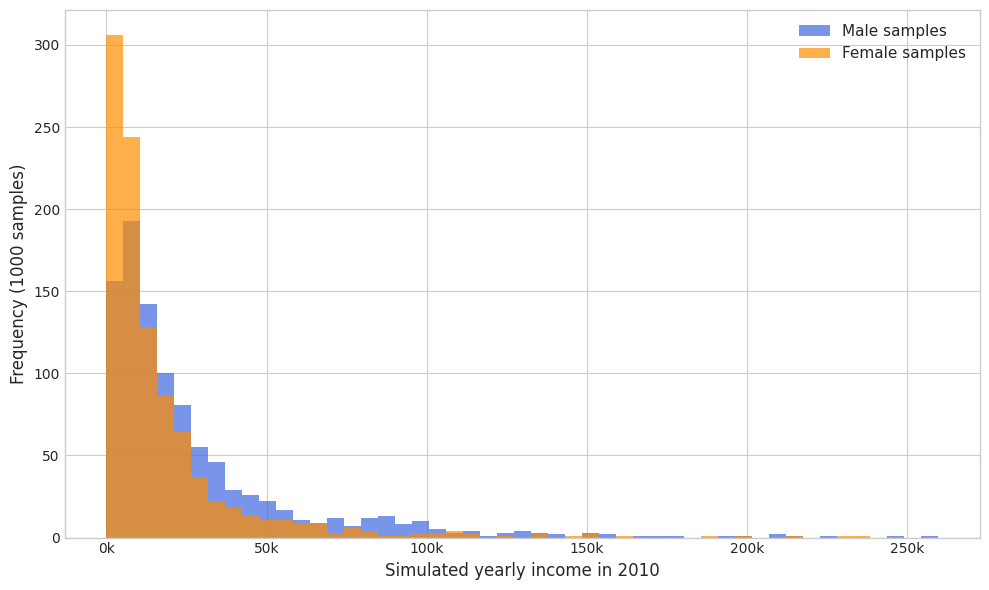

In [10]:
"""MC sampling to compute the P(male_income > female_income | T=2010)."""

n_samples = 1000
with open("/workspace/results/genders/distribution_params_2010.json", 'r', encoding='utf-8') as f:
    params = json.load(f)

male_params = params['male']
female_params = params['female']

male_samples = np.random.lognormal(mean=male_params['mu'], sigma=male_params['sigma'], size=n_samples)
female_samples = np.random.lognormal(mean=female_params['mu'], sigma=female_params['sigma'], size=n_samples)

male_earns_more_count = np.sum(male_samples > female_samples)
probability = male_earns_more_count / n_samples

print(f"Number of simulations: {n_samples}")
print(f"Times male earned more than female: {male_earns_more_count}")
print(f"Probability that a male earns more than a female: {probability:.1%}")

def plot_histograms(male_data, female_data):
    """Generates and saves a histogram comparison plot for a given year."""
    plt.style.use('seaborn-v0_8-whitegrid')
    _, ax = plt.subplots(figsize=(10, 6))

    max_val = max(np.percentile(male_data, 99), np.percentile(female_data, 99))
    bins = np.linspace(0, max_val, 50)

    ax.hist(male_data, bins=bins, alpha=0.7, label='Male samples', color='royalblue')
    ax.hist(female_data, bins=bins, alpha=0.7, label='Female samples', color='darkorange')

    ax.set_xlabel('Simulated yearly income in 2010', fontsize=12)
    ax.set_ylabel('Frequency (1000 samples)', fontsize=12)
    ax.legend(fontsize=11)

    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda val, _: f"{int(val/1000)}k")
    )
    plt.tight_layout()

    results_dir = '../results/figures'
    os.makedirs(results_dir, exist_ok=True)
    file_path = os.path.join(results_dir, '2010_samples.png')
    plt.savefig(file_path, dpi=300)

    plt.show()

plot_histograms(male_data=male_samples, female_data=female_samples)